# If you are reading this offline...

* Please <span style="color:red;font-weight: bold;font-size:30px">re-run the whole notebook</span> for plotly and altair graph to show up!

# Overview:

#### Aim: Predicting customer expenditure using customer information ([Source of dataset (Kaggle)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis))
#### What we going to do in this notebook:
1. Do an overview on dataset
2. Checking every variable given in the dataset

# (0) Import Library + Dataset

In [1]:
## pip install altair vega_datasets
## pip install vega
## pip install -U kaleido

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import altair as alt

### Visualization function for response:

In [4]:
def _getMetaResponse(meta):
    temp = {}
    temp["interactive"] = 1
    
    if "interactive" in meta:
        temp["interactive"] = meta["interactive"]
        
    return temp

In [5]:
def showResponseDetails(meta = {}):
    import plotly.graph_objects as go
    import plotly.figure_factory as ff
    from plotly.subplots import make_subplots

    meta = _getMetaResponse(meta)
    
    fig0 = ff.create_distplot([customerData['MntWines'].values], ['MntWines'],bin_size = 200)
    fig1 = ff.create_distplot([customerData['MntGoldProds'].values], ['MntGoldProds'],bin_size = 50)
    fig2 = ff.create_distplot([customerData['MntGroceryProducts'].values], ['MntGroceryProducts'],bin_size = 200)
    fig3 = ff.create_distplot([customerData['TotalPurchase'].values], ['TotalPurchase'],bin_size = 5)

    fig = make_subplots(rows=5, cols=2,
                        subplot_titles=("MntWines","MntGoldProds","", "","","",
                                                       "MntGroceryProducts","TotalPurchase","",""),
                       row_heights=[0.09,0.4,0.02,0.09,0.4],
                       vertical_spacing=0.02)

    box0 = go.Box(x = customerData["MntWines"],legendgroup = "MntWines",showlegend = False,name = "")
    box1 = go.Box(x = customerData["MntGoldProds"],legendgroup = "MntGoldProds",showlegend = False,name = "")
    box2 = go.Box(x = customerData["MntGroceryProducts"],legendgroup = "MntGroceryProducts",showlegend = False,name = "")
    box3 = go.Box(x = customerData["TotalPurchase"],legendgroup = "TotalPurchase",showlegend = False,name = "")
    trace0 = go.Histogram(fig0['data'][0],legendgroup = "MntWines",marker_color='DarkOrchid')
    trace1 = go.Histogram(fig1['data'][0],legendgroup = "MntGoldProds",marker_color='DarkOrange')
    trace2 = go.Histogram(fig2['data'][0],legendgroup = "MntGroceryProducts",marker_color='LawnGreen')
    trace3 = go.Histogram(fig3['data'][0],legendgroup = "TotalPurchase",marker_color='MediumSlateBlue')
    line0 = go.Scatter(fig0['data'][1],legendgroup = "MntWines",line=dict(color='RebeccaPurple',width=1))
    line1 = go.Scatter(fig1['data'][1],legendgroup = "MntGoldProds",line=dict(color='OrangeRed',width=1))
    line2 = go.Scatter(fig2['data'][1],legendgroup = "MntGroceryProducts",line=dict(color='MediumSeaGreen',width=1))
    line3 = go.Scatter(fig3['data'][1],legendgroup = "TotalPurchase",line=dict(color='RebeccaPurple',width=1))


    fig.append_trace(box0, 1, 1)
    fig.append_trace(box1, 1, 2)
    fig.append_trace(box2, 4, 1)
    fig.append_trace(box3, 4, 2)

    fig.append_trace(trace0, 2, 1)
    fig.append_trace(trace1, 2, 2)
    fig.append_trace(trace2, 5, 1)
    fig.append_trace(trace3, 5, 2)

    fig.append_trace(line0, 2, 1)
    fig.append_trace(line1, 2, 2)
    fig.append_trace(line2, 5, 1)
    fig.append_trace(line3, 5, 2)


    fig.update_layout(height=1300,width = 900)
    if meta["interactive"] == 1:
        fig.show()
    else:
        fig.show("svg")

### Visualization function for numerical data:

In [6]:
def _numPredictorDetailsMeta(meta):
    temp = {}
    temp["interactive"] = 1
    temp["height"] = 500
    temp["width"] = None
    
    if meta != None:
        if "interactive" in meta:
            temp["interactive"] = meta["interactive"]
        if "height" in meta:
            temp["height"] = meta["height"]
        if "width" in meta:
            temp["width"] = meta["width"]
    
    return temp

def numPredictorDetails(dataset,x,binSize,meta = None):
    
    import plotly.graph_objects as go
    import plotly.figure_factory as ff
    from plotly.subplots import make_subplots
    
    ## get default value
    meta = _numPredictorDetailsMeta(meta)

    fig0 = ff.create_distplot([dataset[x].values], [x],bin_size = binSize)

    fig = make_subplots(rows=2, cols=1,
                        subplot_titles=(x,""),
                       row_heights=[0.2,0.8],
                       vertical_spacing=0.02)

    box0 = go.Box(x = dataset[x],legendgroup = x,showlegend = False,name = "")
    trace0 = go.Histogram(fig0['data'][0],legendgroup = x,marker_color='DarkOrchid')
    line0 = go.Scatter(fig0['data'][1],legendgroup = x,line=dict(color='RebeccaPurple',width=1))

    fig.append_trace(box0, 1, 1)
    fig.append_trace(trace0, 2, 1)
    fig.append_trace(line0, 2, 1)

    fig.update_layout(height= meta["height"],width = meta["width"])
    if meta["interactive"] == 1:
        fig.show()
    else:
        fig.show("svg")

In [7]:
def _scatterResponseMeta(meta):
    temp = {}
    temp["interactive"] = 1
    temp["height"] = 1300
    temp["width"] = 900
    
    if meta != None:
        if "interactive" in meta:
            temp["interactive"] = meta["interactive"]
        if "height" in meta:
            temp["height"] = meta["height"]
        if "width" in meta:
            temp["width"] = meta["width"]
    
    return temp

def scatterResponse(dataset,x,meta = None):
    
    ## get default value
    meta = _scatterResponseMeta(meta)

    fig = make_subplots(rows=5, cols=4,
                        subplot_titles=("MntWines","","MntGoldProds","",
                                        "","","","",
                                        "","","","",
                                        "MntGroceryProducts","","TotalPurchase","",
                                        "","","",""), 
                        row_heights=[0.05,0.415,0.02,0.05,0.415],
                        column_widths=[0.45,0.05,0.45,0.05],
                       vertical_spacing=0.02)

    boxX0 = go.Box(x = dataset[x],legendgroup = "MntWines",showlegend = False,name = "")
    boxX1 = go.Box(x = dataset[x],legendgroup = "MntGoldProds",showlegend = False,name = "")
    boxX2 = go.Box(x = dataset[x],legendgroup = "MntGroceryProducts",showlegend = False,name = "")
    boxX3 = go.Box(x = dataset[x],legendgroup = "TotalPurchase",showlegend = False,name = "")

    boxY0 = go.Box(y = dataset["MntWines"],legendgroup = "MntWines",showlegend = False,name = "",
                  fillcolor='Orchid',line=dict(color='RebeccaPurple'))
    boxY1 = go.Box(y = dataset["MntGoldProds"],legendgroup = "MntGoldProds",showlegend = False,name = "",
                  fillcolor='LightPink',line=dict(color='OrangeRed'))
    boxY2 = go.Box(y = dataset["MntGroceryProducts"],legendgroup = "MntGroceryProducts",showlegend = False,name = "",
                  fillcolor='PaleGreen',line=dict(color='MediumSeaGreen'))
    boxY3 = go.Box(y = dataset["TotalPurchase"],legendgroup = "TotalPurchase",showlegend = False,name = "",
                  fillcolor='Thistle',line=dict(color='RebeccaPurple'))

    line0 = go.Scatter(x = dataset[x], y = dataset["MntWines"], mode = "markers", marker = {'color' : 'DarkOrchid'},
                       showlegend = True,legendgroup = "MntWines",name = "MntWines")
    line1 = go.Scatter(x = dataset[x], y = dataset["MntGoldProds"],mode = "markers", marker = {'color' : 'DarkOrange'},
                       showlegend = True,legendgroup = "MntGoldProds",name = "MntGoldProds")
    line2 = go.Scatter(x = dataset[x], y = dataset["MntGroceryProducts"], mode = "markers",marker = {'color' : 'LawnGreen'},
                       showlegend = True,legendgroup = "MntGroceryProducts",name = "MntGroceryProducts")
    line3 = go.Scatter(x = dataset[x], y = dataset["TotalPurchase"], mode = "markers",marker = {'color' : 'MediumSlateBlue'},
                       showlegend = True,legendgroup = "TotalPurchase",name = "TotalPurchase")

    fig.append_trace(boxX0, 1, 1)
    fig.append_trace(boxX1, 1, 3)
    fig.append_trace(boxX2, 4, 1)
    fig.append_trace(boxX3, 4, 3)

    fig.append_trace(boxY0, 2, 2)
    fig.append_trace(boxY1, 2, 4)
    fig.append_trace(boxY2, 5, 2)
    fig.append_trace(boxY3, 5, 4)

    fig.append_trace(line0, 2, 1)
    fig.append_trace(line1, 2, 3)
    fig.append_trace(line2, 5, 1)
    fig.append_trace(line3, 5, 3)

    fig.update_layout(height=meta["height"],width = meta["width"])
    if meta["interactive"] == 1:
        fig.show()
    else:
        fig.show("svg")

### Visualization function for categorical data:

In [8]:
def boxPlotXY(dataset,x,y,axes = [],axX = 0,axY = 0):
    
    import seaborn as sb
    
    grouped = dataset.loc[:,[x, y]].groupby([x]).median().sort_values(by=y)
    if(len(axes) == 0):
        sb.boxplot(x = dataset[x],y = dataset[y],order=grouped.index,orient = "v")
    else:
        sb.boxplot(x = dataset[x],y = dataset[y],order=grouped.index,orient = "v",ax = axes[axX,axY])

def boxPlotResponse(dataset,x,Y_Array,x_count,y_count):
    
    import matplotlib.pyplot as plt
    
    if(x_count * y_count != len(Y_Array)):
        raise IndexError("Graph count does not match with the number of response.")
    
    f, axes = plt.subplots(y_count, x_count, figsize=(20, 12))
    
    i = 0
    j = 0
    for var in Y_Array:
        boxPlotXY(customerData,x,var,axes,i,j)
        j+=1
        if(j == x_count):
            j=0
            i+=1

def boxPlotPredictor(dataset,y,X_Array,x_count,y_count):
    
    import matplotlib.pyplot as plt
    
    if(x_count * y_count != len(X_Array)):
        raise IndexError("Graph count does not match with the number of response.")
    
    f, axes = plt.subplots(y_count, x_count, figsize=(20, 12))
    
    i = 0
    j = 0
    for var in X_Array:
        boxPlotXY(customerData,var,y,axes,i,j)
        j+=1
        if(j == x_count):
            j=0
            i+=1

In [9]:
def histogramCountOld(dataset,x):
    
    import seaborn as sb
    
    #Cite M2 ExploratoryAnalysis

    # Generations in the Dataset
    print("Number of", x ,":", len(dataset[x].unique()))

    # Pokemons in each Generation
    print(dataset[x].value_counts())
    sb.catplot(y = x, data = dataset, kind = "count")

In [10]:
def _getMetaHist(meta,dataset,x):
    temp = {}
    temp["interactive"] = 1
    temp["height"] = 70 * (len(dataset[x].unique())+1)
    temp["width"] = 500
    
    if meta != None:
        if "interactive" in meta:
            temp["interactive"] = meta["interactive"]
        if "height" in meta:
            temp["height"] = meta["height"]
        if "width" in meta:
            temp["width"] = meta["width"]
    
    return temp

def histogramCount(dataset,x,category_order = [],meta = None):
    
    import plotly.express as px
    
    meta = _getMetaHist(meta,dataset,x)
    
    if len(category_order) != 0:
        fig = px.histogram(dataset, y = x,text_auto = True, category_orders={x: category_order})
    else:
        fig = px.histogram(dataset, y = x,text_auto = True)
        
    fig.update_layout(height= meta["height"],width = meta["width"])
    
    if meta["interactive"] == 1:
        fig.show()
    else:
        fig.show("svg")

In [11]:
def catVarResponse(dataset,x,Y_Array,axes,category_order = [],meta = None):
    histogramCount(dataset,x,category_order,meta)
    boxPlotResponse(dataset,x,Y_Array,axes[0],axes[1])

## Import Dataset

In [12]:
customerData = pd.read_csv('dataset/customerData_Clean.csv')
customerData.drop(columns = "Unnamed: 0", inplace = True)
customerData

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation        Married  71613.0        0         0   
3           1984  Graduation        Married  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2161        1967  Graduation        Married  61223.0        0         1   
2162        1946         PhD        Married  64014.0        2         1   
2163        1981  Graduation       Divorced  56981.0        0         0   
2164        1956      Master        Married  69245.0        0         1   
2165        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebPurchases  \
0          58       635         88              546  ...                8   
1          38        11          1                6  ...                1   
2          26       426         49              127  ...                8   
3          26        11          4               20  ...                2   
4          94       173         43              118  ...                5   
...       ...       ...        ...              ...  ...              ...   
2161       46       709         43              182  ...                9   
2162       56       406          0               30  ...                8   
2163       91       908         48              217  ...                2   
2164        8       428         30              214  ...                6   
2165       40        84          3               61  ...                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                      10                  4                  7   
1                       1                  2                  5   
2                       2                 10                  4   
3                       0                  4                  6   
4                       3                  6                  5   
...                   ...                ...                ...   
2161                    3                  4                  5   
2162                    2                  5                  7   
2163                    3                 13                  6   
2164                    5                 10                  3   
2165                    1                  4                  7   

      MntGroceryProducts  TotalPurchase  AcceptedCmp  YearRange  TotalChild  \
0                    806             25            1       1950           0   
1                      9              6            0       1950           2   
2                    287             21            0       1960           0   
3                     34              8            0       1980           1   
4                    207             19            0       1980           1   
...                  ...            ...          ...        ...         ...   
2161                 267             18            0       1960           1   
2162                  30             22            1       1940           3   
2163                 297             19            1       1980           0   
2164                 324             23            0       1950           1   
2165                  66             11            1       1950           2   

      HaveChild  
0             0  
1             1  
2             0  
3             1  
4             1  
...         ...  
2161          1  
2162          1  
2163          0  
2164          1  
2165          1  

[2166 rows x 24 columns]

To aid with the visualization later, we will convert the data type to category for categorical data here.

In [13]:
colOfNum = []
colOfCat = []
for col in customerData:
    if str(customerData[col].dtypes) != "int64" and str(customerData[col].dtypes) != "float64":
        colOfCat.append(str(col))
    else:
        colOfNum.append(str(col))
        
colOfCat.extend(['Kidhome','Teenhome','YearRange','HaveChild'])

for element in ['Kidhome','Teenhome','YearRange','HaveChild']:
    colOfNum.remove(element)
    
print("Column which consider as Numerical Data:\n", colOfNum)
print()
print("Column which consider as Categorical Data:\n",colOfCat)

Column which consider as Numerical Data:
 ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase', 'AcceptedCmp', 'TotalChild']

Column which consider as Categorical Data:
 ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'YearRange', 'HaveChild']


In [14]:
for data in colOfCat:
    customerData[data] = customerData[data].astype("category")

# (1) Overview

Below is the info of the dataset.

In [15]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2166 non-null   int64   
 1   Education            2166 non-null   category
 2   Marital_Status       2166 non-null   category
 3   Income               2166 non-null   float64 
 4   Kidhome              2166 non-null   category
 5   Teenhome             2166 non-null   category
 6   Recency              2166 non-null   int64   
 7   MntWines             2166 non-null   int64   
 8   MntFruits            2166 non-null   int64   
 9   MntMeatProducts      2166 non-null   int64   
 10  MntFishProducts      2166 non-null   int64   
 11  MntSweetProducts     2166 non-null   int64   
 12  MntGoldProds         2166 non-null   int64   
 13  NumDealsPurchases    2166 non-null   int64   
 14  NumWebPurchases      2166 non-null   int64   
 15  NumCatalogPurchases  

In [16]:
customerData[colOfNum].describe()

Year_Birth        Income      Recency     MntWines    MntFruits  \
count  2166.000000   2166.000000  2166.000000  2166.000000  2166.000000   
mean   1968.880425  51485.832410    49.157433   304.746076    26.234995   
std      11.686277  20127.393997    28.890662   336.685171    39.551197   
min    1940.000000   7500.000000     0.000000     0.000000     0.000000   
25%    1959.000000  35352.000000    24.000000    24.000000     2.000000   
50%    1970.000000  51222.500000    49.500000   176.000000     8.000000   
75%    1977.000000  67866.250000    74.000000   505.000000    33.000000   
max    1996.000000  94384.000000    99.000000  1493.000000   199.000000   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2166.000000      2166.000000       2166.000000   2166.000000   
mean        162.832410        37.174515         26.777008     43.479686   
std         213.314447        54.123262         40.469013     50.512398   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          68.000000        12.000000          8.000000     25.000000   
75%         227.750000        49.750000         33.000000     56.000000   
max         984.000000       259.000000        198.000000    249.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2166.000000      2166.000000          2166.000000   
mean            2.316251         4.077101             2.613112   
std             1.806630         2.623057             2.725789   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        11.000000            11.000000   

       NumStorePurchases  NumWebVisitsMonth  MntGroceryProducts  \
count        2166.000000        2166.000000         2166.000000   
mean            5.831948           5.320406          226.241921   
std             3.213197           2.253213          276.225962   
min             2.000000           1.000000            1.000000   
25%             3.000000           4.000000           25.000000   
50%             5.000000           6.000000           90.000000   
75%             8.000000           7.000000          351.000000   
max            13.000000           9.000000         1306.000000   

       TotalPurchase  AcceptedCmp   TotalChild  
count    2166.000000  2166.000000  2166.000000  
mean       14.838412     0.437211     0.957064  
std         7.570376     0.872723     0.747901  
min         4.000000     0.000000     0.000000  
25%         8.000000     0.000000     0.000000  
50%        15.000000     0.000000     1.000000  
75%        21.000000     1.000000     1.000000  
max        39.000000     5.000000     3.000000

In [17]:
customerData[colOfCat].describe()

Education Marital_Status  Kidhome  Teenhome  YearRange  HaveChild
count         2166           2166     2166      2166       2166       2166
unique           5              3        3         3          6          2
top     Graduation        Married        0         0       1970          1
freq          1094           1405     1244      1110        715       1562

# (2) Response

For this project, we will pick 4 variables as our responses. They are:  

#### (1) MntWines -  
Amount spent on wine in last 2 years.

#### (2) MntGroceryProducts -  
Amount spent on groceries (fruits, meat, fish and sweets) in last 2 years.

#### (3) MntGoldProds -  
Amount spent on gold in last 2 years. 

#### (4) TotalPurchase -  
Total number of purchases made by the customers in this store.

Later, we will see how the customers' personality affect these variables.  
Now, let us take a closer look at our responses first. How does our response looks like?

In [18]:
response = ["MntWines","MntGoldProds","MntGroceryProducts","TotalPurchase"]

In [19]:
customerData[response].describe()

MntWines  MntGoldProds  MntGroceryProducts  TotalPurchase
count  2166.000000   2166.000000         2166.000000    2166.000000
mean    304.746076     43.479686          226.241921      14.838412
std     336.685171     50.512398          276.225962       7.570376
min       0.000000      0.000000            1.000000       4.000000
25%      24.000000      9.000000           25.000000       8.000000
50%     176.000000     25.000000           90.000000      15.000000
75%     505.000000     56.000000          351.000000      21.000000
max    1493.000000    249.000000         1306.000000      39.000000

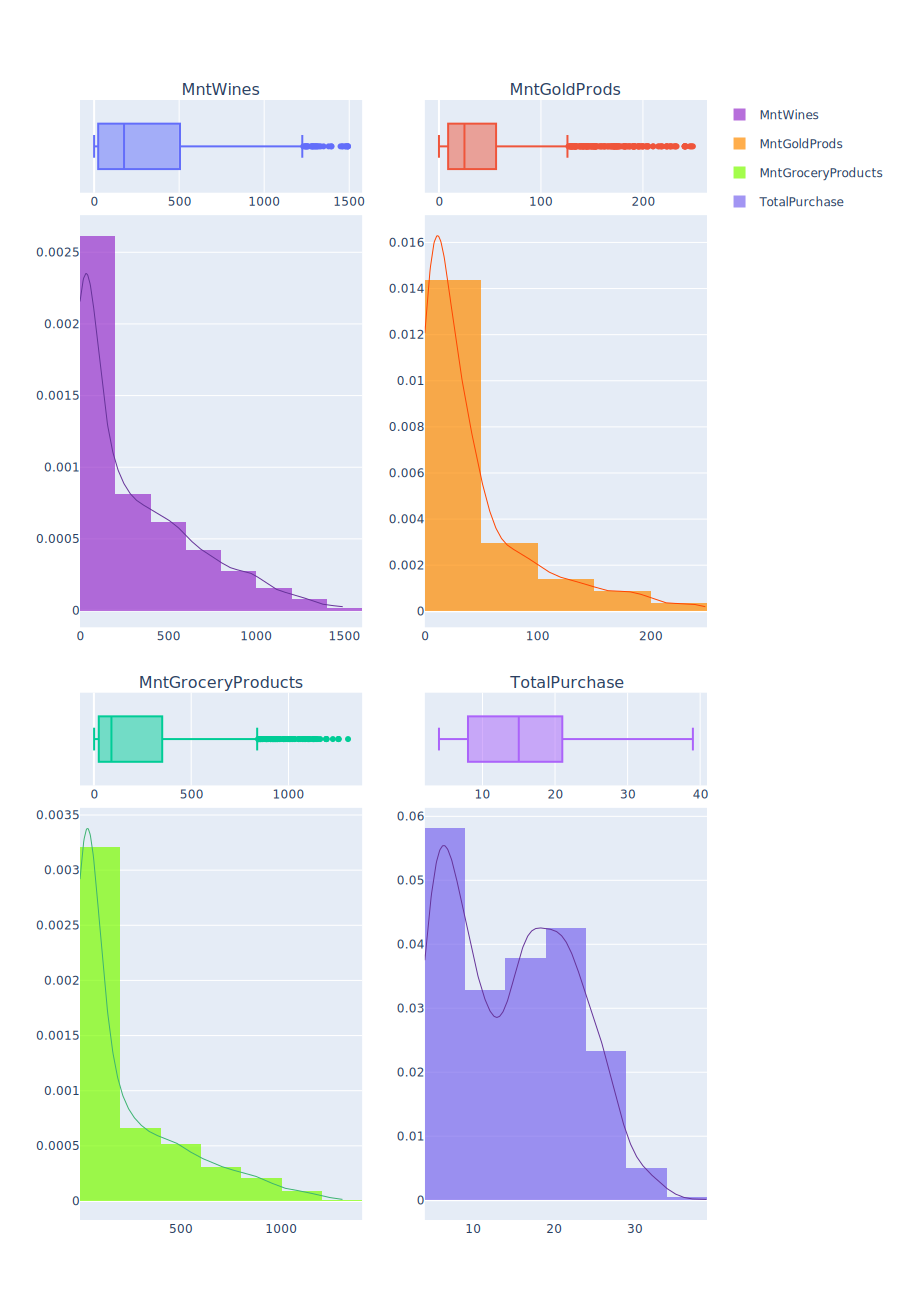

In [20]:
showResponseDetails(meta = {"interactive": 0})

As shown from the graphs above, all the responses are skewed to the left.

# (3) Relationship Between Predictors and Responses

Now, let us take a look at the predictors that we choose for our machine learning model, and their relationship with responses.

In [21]:
response = ["MntWines","MntGoldProds","MntGroceryProducts","TotalPurchase"]

### Education

As mentioned in the [exploratary](Data-exploratary.ipynb#Education) notebook, this variable indicates the customer's education level and there are 5 categories.  

From the graph, we can see all 5 categories' median for Responses are quite similar, so Education may not help with the prediction a lot. Nonetheless, we pick this variable as one of our predictors.

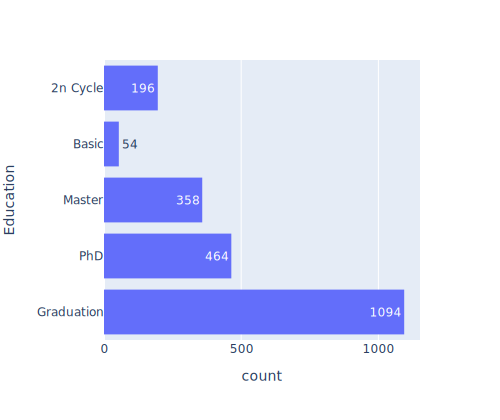

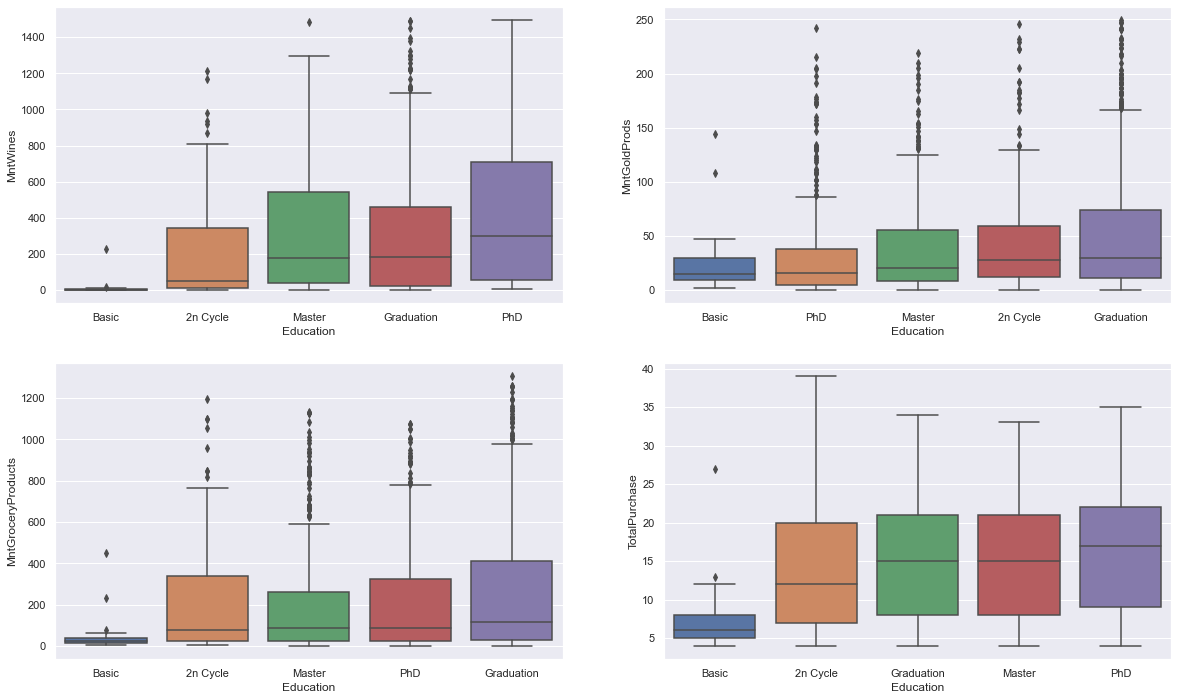

In [22]:
catVarResponse(customerData, x = "Education", Y_Array = response,axes = [2,2],
              meta = {"interactive": 0})

### Marital_Status

As mentioned in the [exploratary](Data-exploratary.ipynb#Marital_Status) notebook, This variable indicates customers' marital status. and there are 8 categories in this variable.  

From the graph, we can see all 3 categories' median for every responses are quite similar (if compare to education, the median is even more similar), so Marital_Status may not help with the prediction a lot. Nonetheless, we pick this variable as one of our predictors.

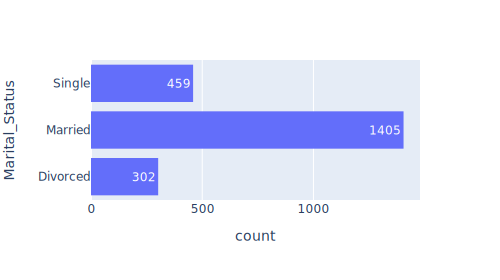

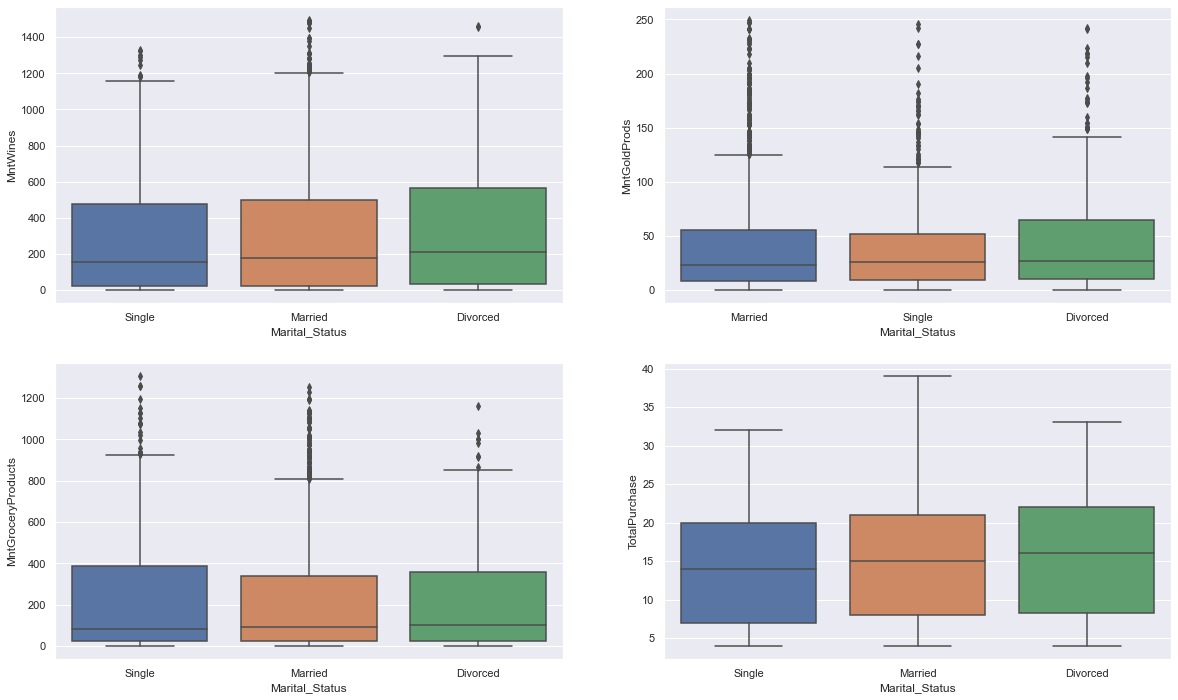

In [23]:
catVarResponse(customerData, x = "Marital_Status", Y_Array = response,
               axes = [2,2], meta = {"interactive": 0}, category_order = ["Single","Married","Divorced"])

Number of Marital_Status : 3
Married     1405
Single       459
Divorced     302
Name: Marital_Status, dtype: int64


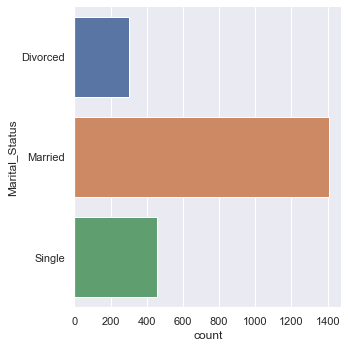

In [24]:
histogramCountOld(customerData,"Marital_Status")

### Income

As mentioned in the [exploratary](Data-exploratary.ipynb#Income) notebook, this variable shows customers' yearly household income.

From the graph, we can see income has relationship that is very closed to linear and high correlation value with all the responses. This means that income can be one of the best predictors for our training later. This also makes sense as income reflect how much things a customer can afford to purchase. We definitely include income as one of our predictor.

<AxesSubplot:>

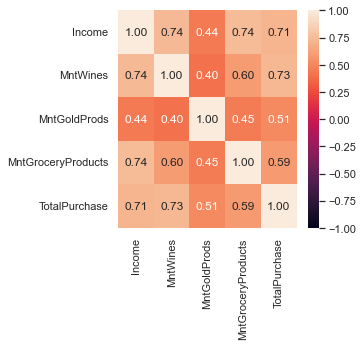

In [25]:
f = plt.figure(figsize=(4,4))
sb.heatmap(customerData[["Income"]+response].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

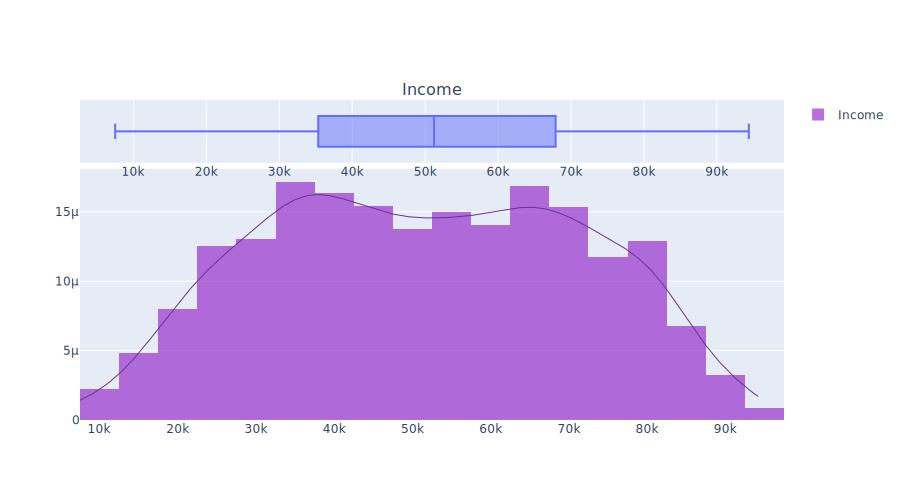

In [26]:
numPredictorDetails(customerData,"Income",binSize = 5000, meta = {"interactive": 0, "width": 900})

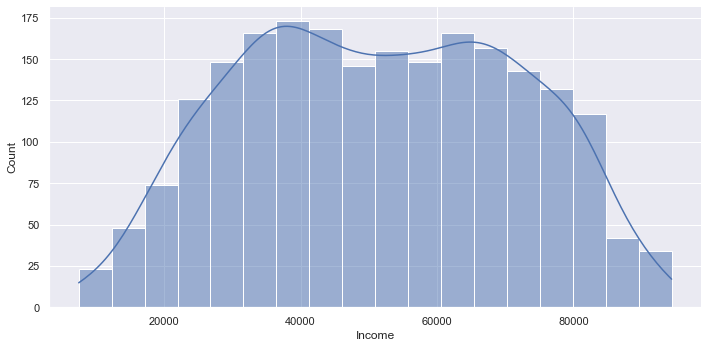

In [27]:
sb.displot(customerData["Income"], kde = True, aspect = 2)

In [28]:
customerData[["Income"]+response].corr()

Income  MntWines  MntGoldProds  MntGroceryProducts  \
Income              1.000000  0.735422      0.440289            0.743454   
MntWines            0.735422  1.000000      0.404741            0.596786   
MntGoldProds        0.440289  0.404741      1.000000            0.449694   
MntGroceryProducts  0.743454  0.596786      0.449694            1.000000   
TotalPurchase       0.714524  0.731604      0.509055            0.592795   

                    TotalPurchase  
Income                   0.714524  
MntWines                 0.731604  
MntGoldProds             0.509055  
MntGroceryProducts       0.592795  
TotalPurchase            1.000000

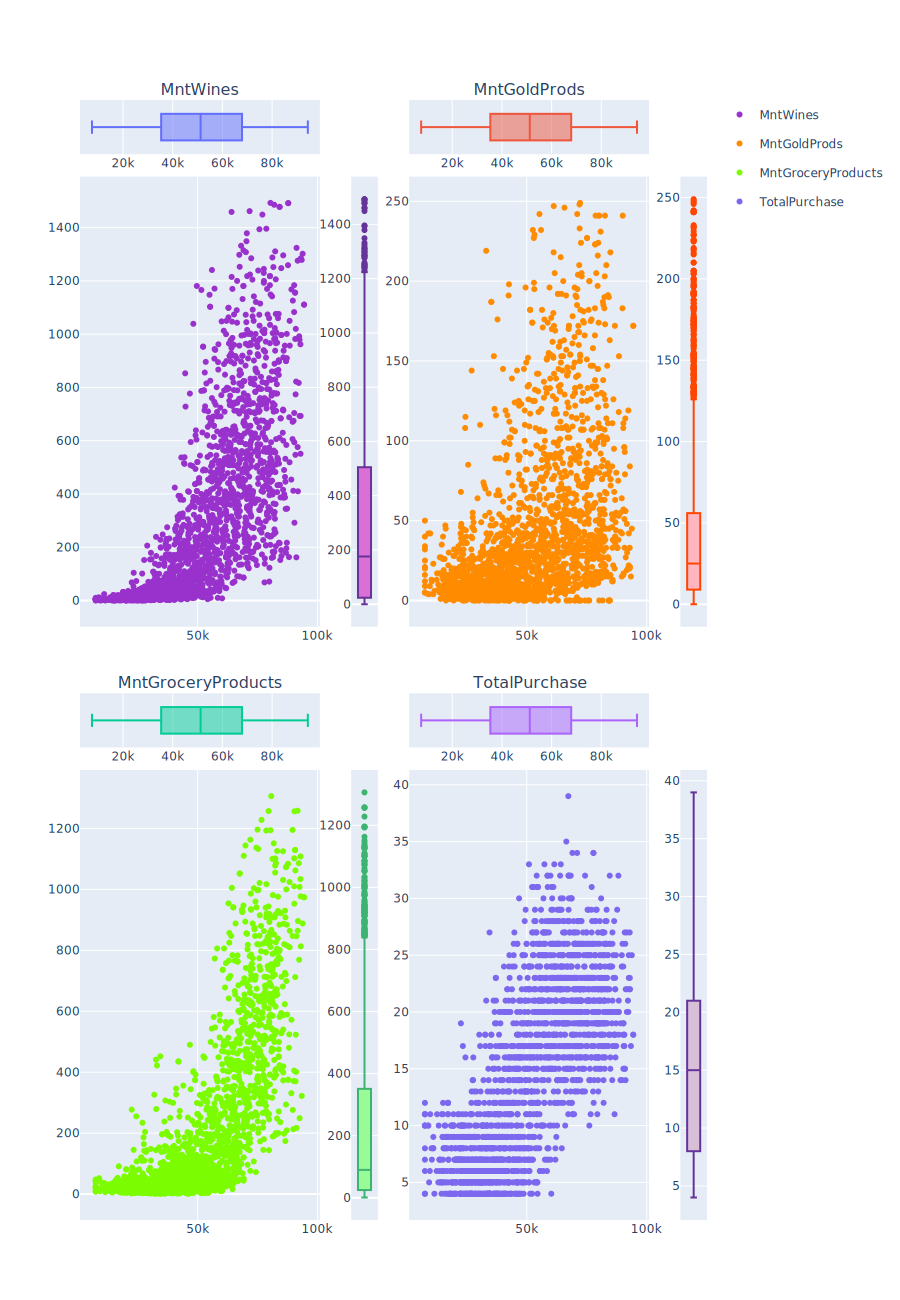

In [29]:
scatterResponse(customerData,"Income", meta = {"interactive": 0})

### TotalChild

This is a [new](Data-cleaning#addingCol) variable we create based on kidhome and teenhome. This variable will indicate customers' total number of children.

From the graph, we can see the median of all responses differs for every different level. From the scatter plot, it show a somewhat linear relationship with all the responses as well. It seems like having more children actually leads to making less sale. We would include this as one of our predictors.

<AxesSubplot:>

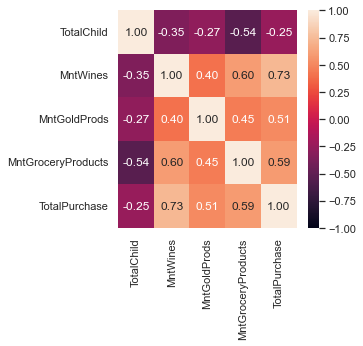

In [30]:
f = plt.figure(figsize=(4,4))
sb.heatmap(customerData[["TotalChild"]+response].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

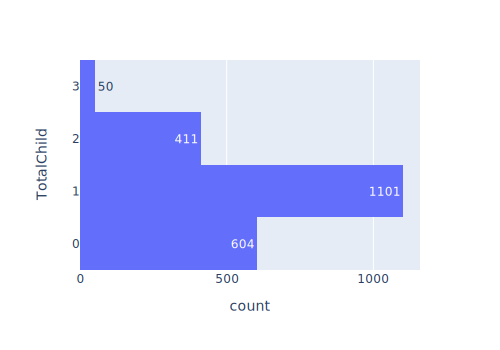

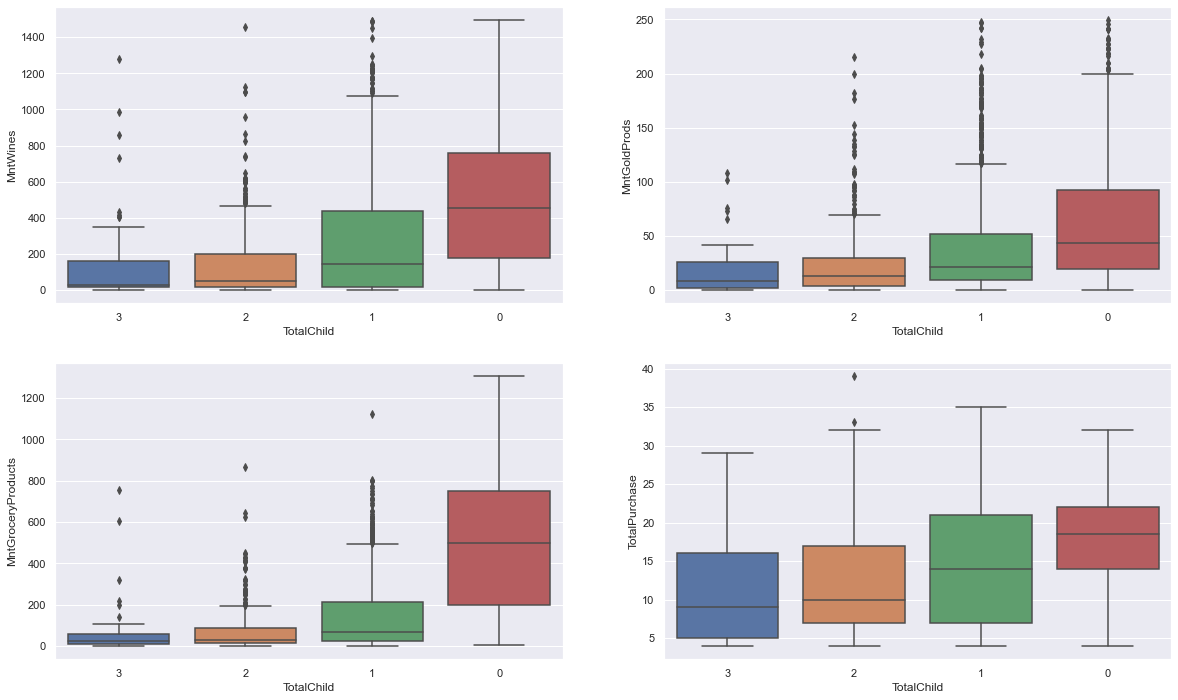

In [31]:
catVarResponse(customerData, x = "TotalChild", Y_Array = response,
               axes = [2,2], meta = {"interactive": 0})

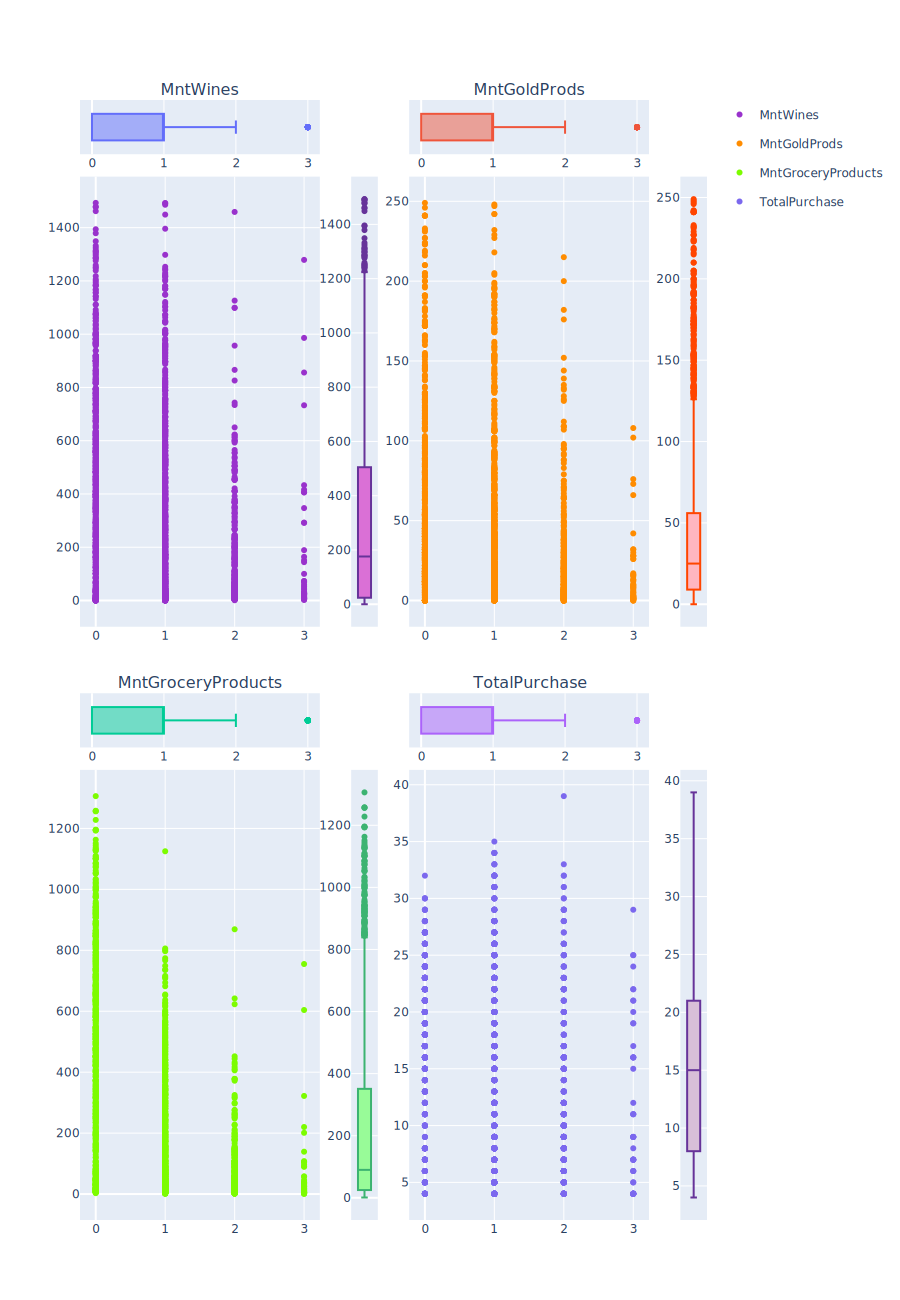

In [32]:
scatterResponse(customerData,"TotalChild",meta = {"interactive": 0})

Number of TotalChild : 4
1    1101
0     604
2     411
3      50
Name: TotalChild, dtype: int64


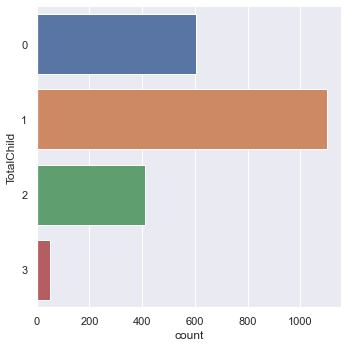

In [33]:
histogramCountOld(customerData,"TotalChild")

### HaveChild

This is a [new](Data-cleaning#addingCol) variable we create based on kidhome and teenhome. This variable will indicate whether the customers' have children.  

From the graph, we can see the median of all responses differs a lot for two different level. This may help with the training later. We would include this as one of our predictors.

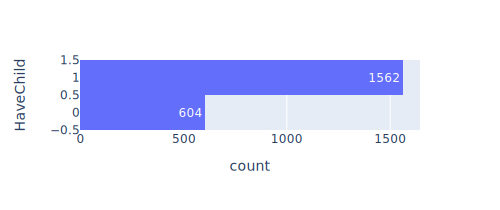

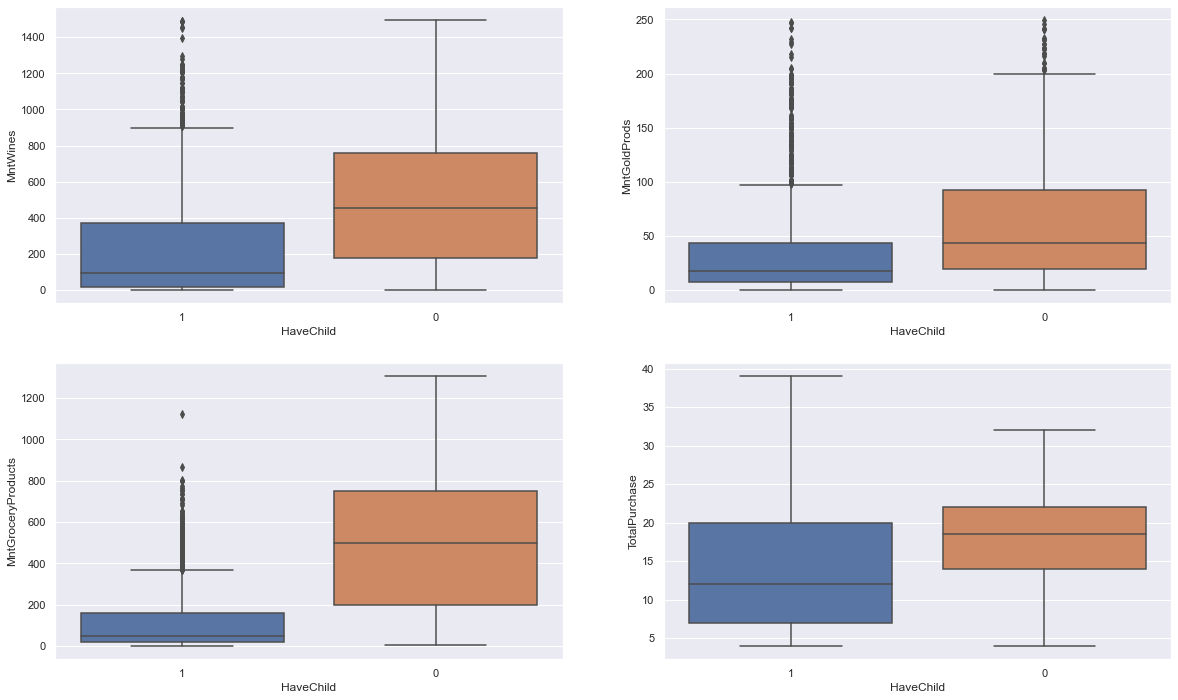

In [34]:
catVarResponse(customerData, x = "HaveChild", Y_Array = response,
               axes = [2,2], meta = {"interactive": 0})

Number of HaveChild : 2
1    1562
0     604
Name: HaveChild, dtype: int64


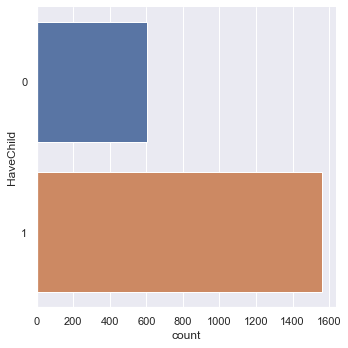

In [35]:
histogramCountOld(customerData,"HaveChild")

### NumWebVisitsMonth

As mentioned in the [exploratary](Data-exploratary.ipynb#NumWebVisitsMonth) notebook, this variable shows the number of visits to company’s website in the last month, which can be interesting.  

From the heatmap, it seems to have negative correlation value with every response. From the boxplot, we can see the median of all responses somewhat differs for every different level. From the scatterplot, It does not seem to have any obvious relationship with the response either. Nonetheless, we pick this variable as one of our predictors.

<AxesSubplot:>

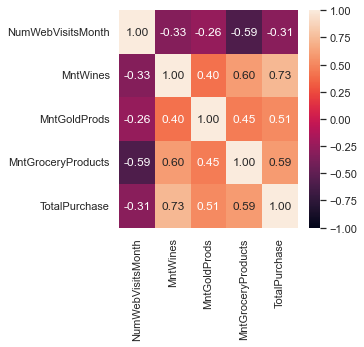

In [36]:
f = plt.figure(figsize=(4,4))
sb.heatmap(customerData[["NumWebVisitsMonth"]+response].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

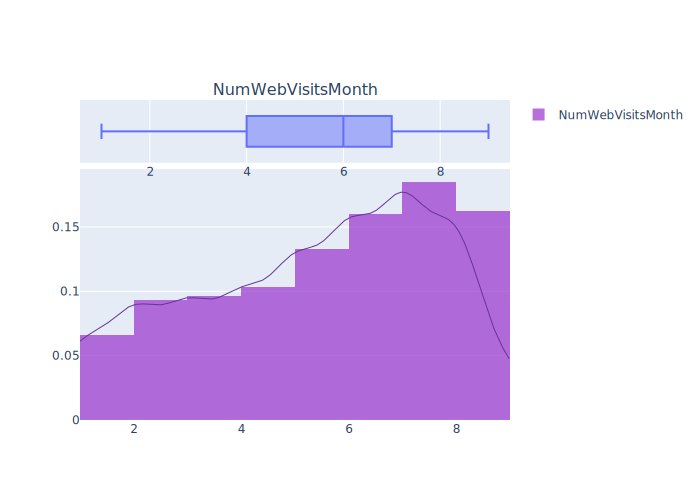

In [37]:
numPredictorDetails(customerData,"NumWebVisitsMonth",binSize = 1, meta = {"interactive": 0})

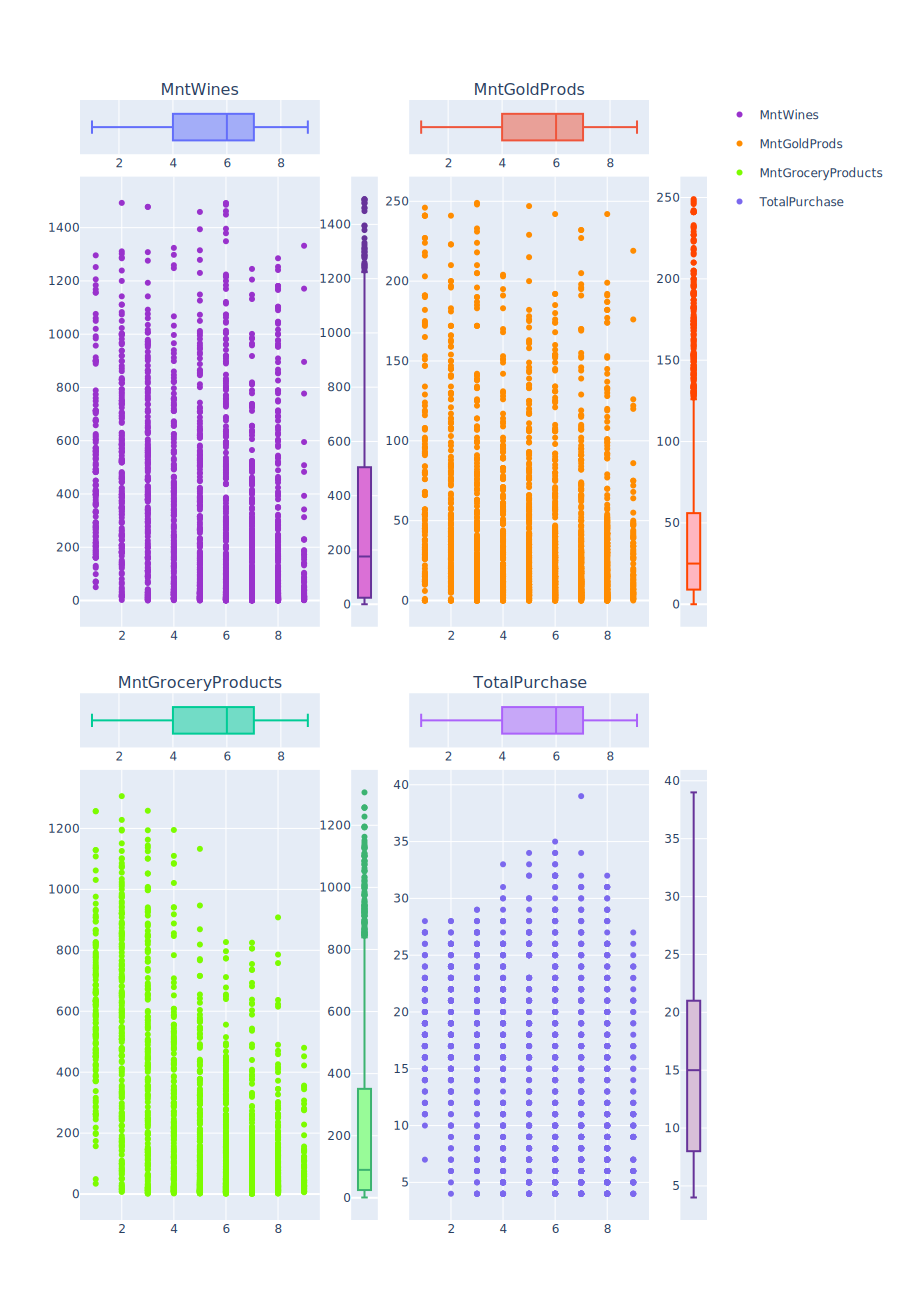

In [38]:
scatterResponse(customerData,"NumWebVisitsMonth",meta = {"interactive": 0})

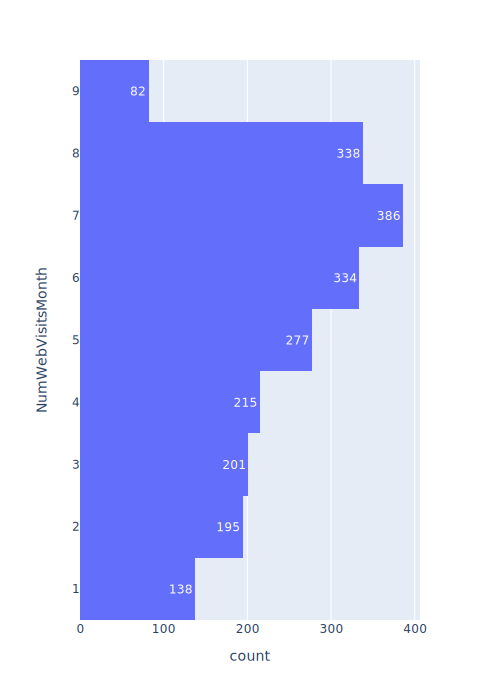

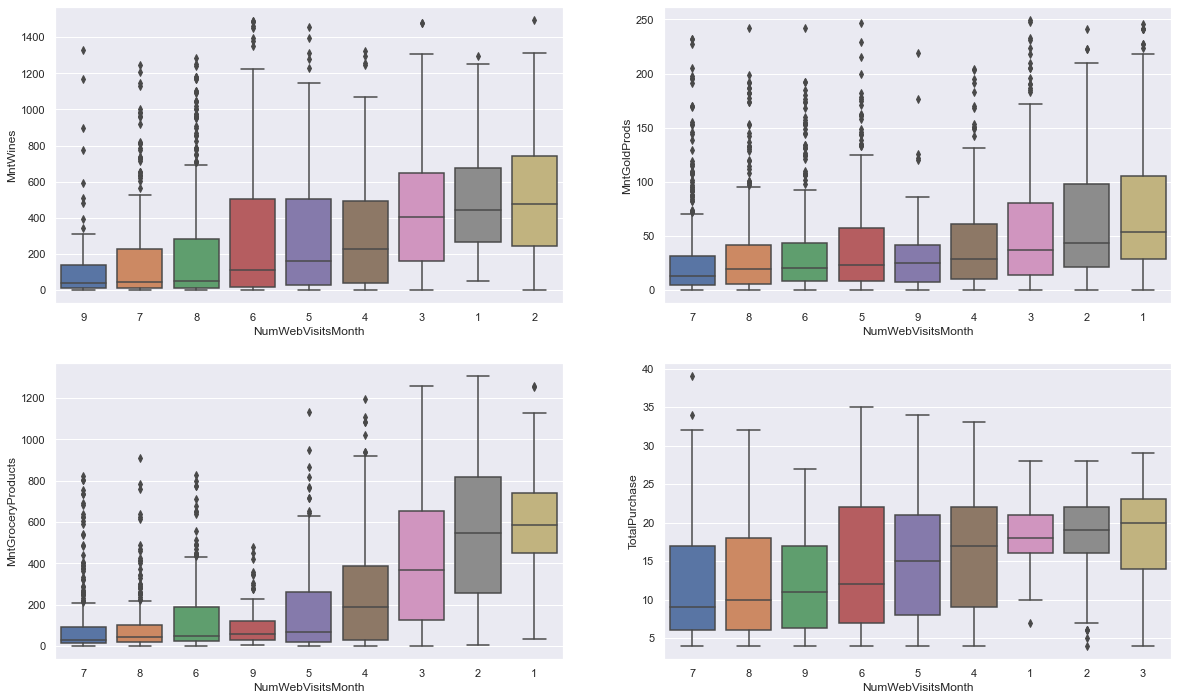

In [39]:
catVarResponse(customerData, x = "NumWebVisitsMonth", Y_Array = response,
               axes = [2,2], meta = {"interactive": 0})

Number of NumWebVisitsMonth : 9
7    386
8    338
6    334
5    277
4    215
3    201
2    195
1    138
9     82
Name: NumWebVisitsMonth, dtype: int64


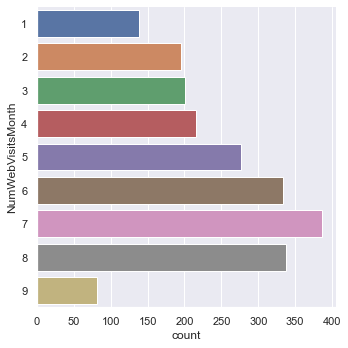

In [40]:
histogramCountOld(customerData,"NumWebVisitsMonth")

### YearRange

This is a [new](Data-cleaning#addingCol) variable we create based on Year_Birth. This variable will categorise customer's birth year into every 10 year.

From the graph, we can see the median of all responses are quite similar for every different level. Although it may not help much with the training later, We still include this as one of our predictors.

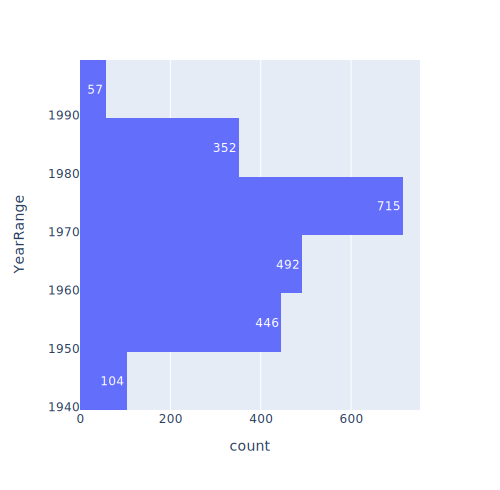

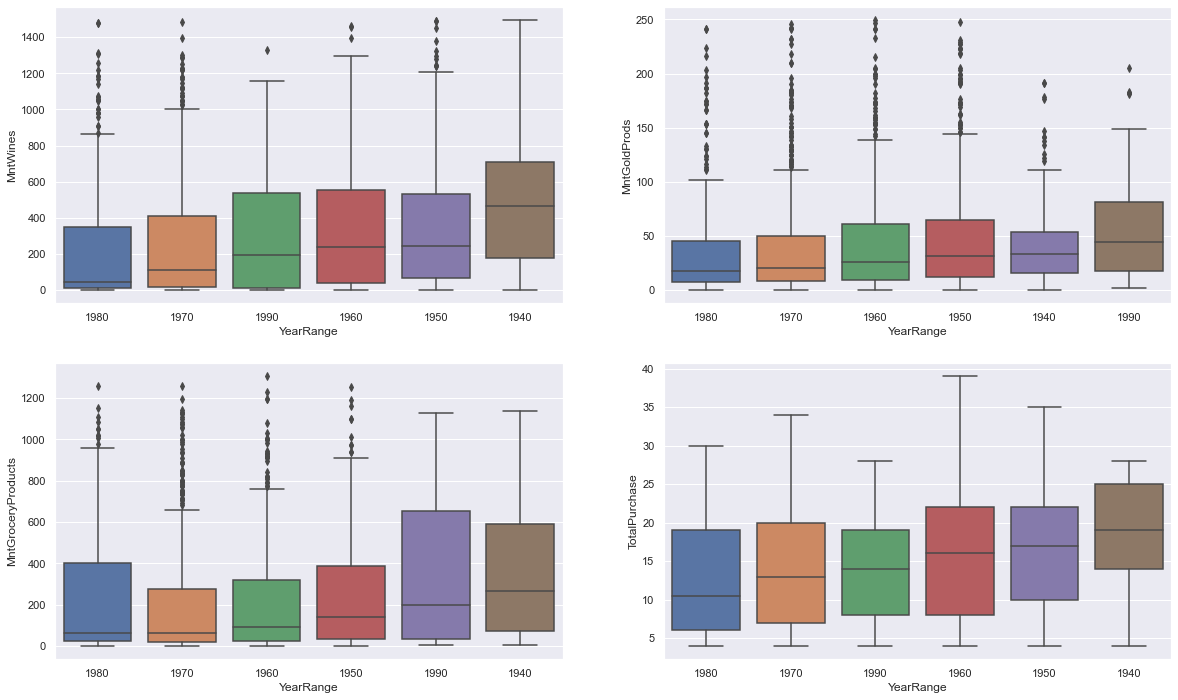

In [41]:
catVarResponse(customerData,"YearRange",response,
               axes = [2,2], meta = {"interactive": 0})

Number of YearRange : 6
1970    715
1960    492
1950    446
1980    352
1940    104
1990     57
Name: YearRange, dtype: int64


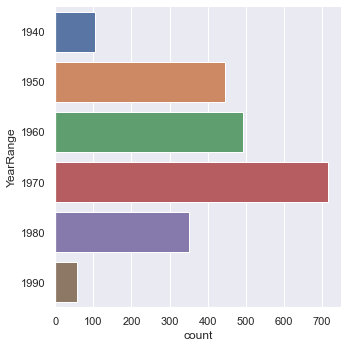

In [42]:
histogramCountOld(customerData,"YearRange")

### Recency

As mentioned in the [exploratary](Data-exploratary.ipynb#Recency) notebook, this shows the number of days since customer's last purchase, which may be interesting.

From the graph, we can see the correlation of recency with responses are quite low, it seems to have no relationship with responses either. The median slightly differ for every responses. We may not use this variable in training.

<AxesSubplot:>

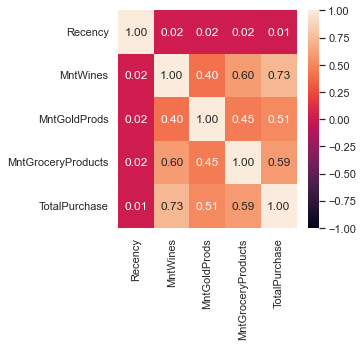

In [43]:
f = plt.figure(figsize=(4,4))
sb.heatmap(customerData[["Recency"]+response].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

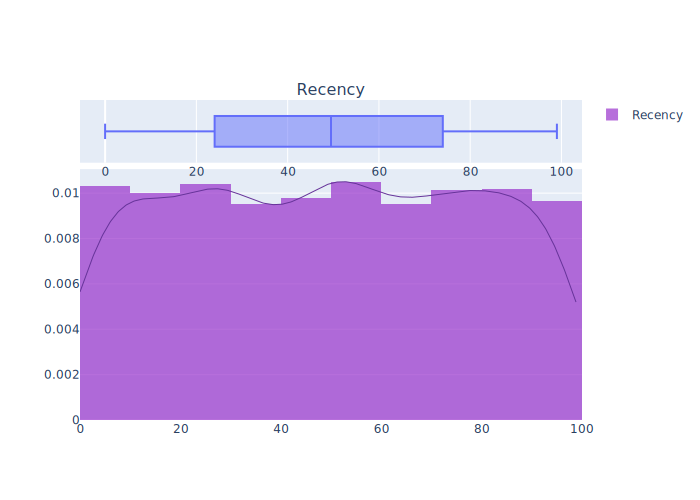

In [44]:
numPredictorDetails(customerData,"Recency",binSize = 10, meta = {"interactive": 0})

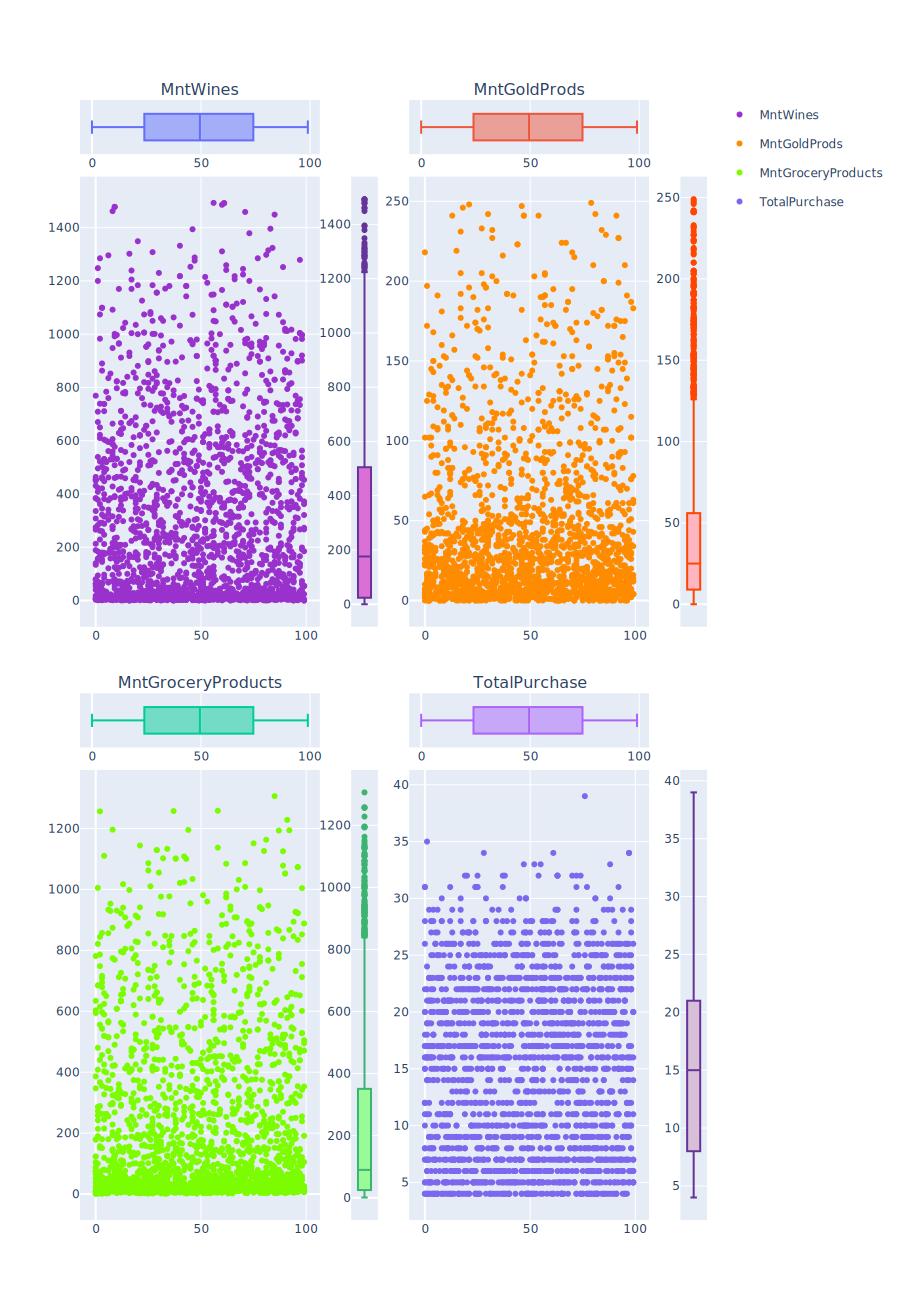

In [45]:
scatterResponse(customerData,"Recency",meta = {"interactive": 0})

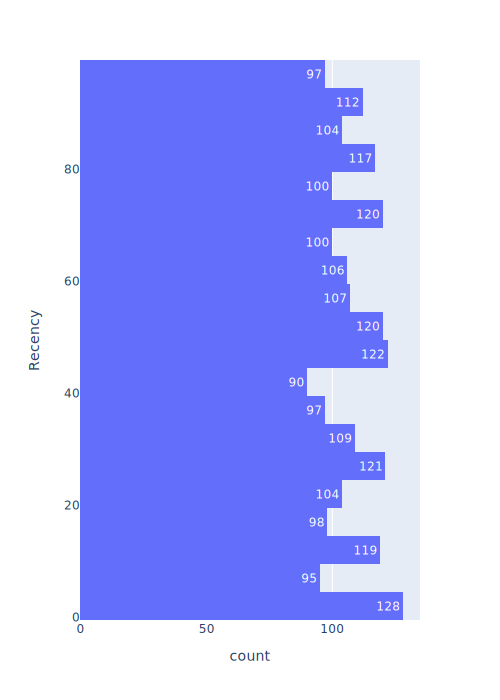

In [ ]:
catVarResponse(customerData,"Recency",response,
               axes = [2,2], meta = {"interactive": 0,"height": 700})

# (4) Gaining insight

We have gone through every variable. Now, let us take a closer look on how these variables may affect each other.

## Exploration - numerical data

In [ ]:
response = ["MntWines","MntGoldProds","MntGroceryProducts","TotalPurchase"]
interestingVar = ["Income","Recency","TotalChild","NumWebVisitsMonth","AcceptedCmp"]
interestingVar.extend(response)
print(interestingVar)

In [ ]:
f = plt.figure(figsize=(16,16))
sb.heatmap(customerData[interestingVar].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

There are lots of value here. There is something that we notice:

#### (1) Income  
Income have really high correlation with response variables as we already know.   

#### (2) Recency
Recency has low correlation value with response and other variable, which means the number of days since customer's last purchase does not related to any factor.

In [ ]:
boxPlotPredictor(customerData,y = "Recency",X_Array = ["Marital_Status","Education","HaveChild","YearRange"],
                x_count = 2,y_count = 2)

#### (3) NumWebVisitsMonth  
At the same time, income has a negative correlation value with NumWebVisitMonth. This means that those with higher income are less likely to visit websites, which is quite surprising. This may mean that the website is not attractive to those with higher income, or those with higher income are less likely to visit or even purchase from the website. If the latter is the reason 

Moreover, NumWebVisitMonth have a negative correlation value to nearly every numerical response, this can mean that the website is poorly designed such that the number of visiting the websites does not related to sales, or the store does not sell their products through their website. This can be further proved as the correlation value between NumWebPurchases and NumWebPurchases are low, and there is no obvious relationship between NumWebPurchases and NumWebPurchases as shown in the jointplot.

In [ ]:
customerData[["NumWebPurchases","NumWebVisitsMonth"]].corr()

In [ ]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData, x = "NumWebPurchases", y = "NumWebVisitsMonth", height = 8)

In [ ]:
f = plt.figure(figsize=(12,12))
sb.heatmap(customerData[["NumWebVisitsMonth","Income"]+response].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [ ]:
boxPlotPredictor(customerData,y = "NumWebVisitsMonth",X_Array = ["Marital_Status","Education","HaveChild","YearRange"],
                x_count = 2,y_count = 2)

#### (4) AcceptedCmp  

From the graph, it seems like acceptedcmp has a relatively high correlation with MntWines but not the others. However, it does not seems to relate to other variable so much.

In [ ]:
boxPlotPredictor(customerData,y = "AcceptedCmp",X_Array = ["Marital_Status","Education","HaveChild","YearRange"],
                x_count = 2,y_count = 2)

#### (5) TotalChild  

It is notable that totalchild has negative correlation value with almost all the other numerical variable, except for NumWebVisitsMonth. This may mean that the customers' which have more children will prefer to go to the store websites, maybe to purchase things.

In [ ]:
boxPlotPredictor(customerData,y = "TotalChild",X_Array = ["Marital_Status","Education","HaveChild","YearRange"],
                x_count = 2,y_count = 2)

## Exploration - Multi-variable scatterplot using altair

In [ ]:
def _toCategorical(dataset,var):
    import pandas as pd
    
    temp = dataset.copy()
    temp[var] = dataset[var].astype('category')
    return temp

def interactiveScatterPlot(dataset,x,y,var,save = 0,fileName = None):
    
    if(str(dataset[var].dtypes) != 'category'):
        dataset = _toCategorical(dataset,var)
        
    alt.renderers.enable('default')
    selection = alt.selection_multi(fields=[var], bind='legend')
    chart = alt.Chart(dataset).mark_circle(size=50).encode(
        alt.X(x),
        alt.Y(y),
        alt.Color(var, 
                  legend=alt.Legend(
                      title=var,  
                      orient='left',
                      titleFontSize=15,
                      labelFontSize=13)
                 ),
        opacity=alt.condition(selection, alt.value(1), alt.value(0))
    ).properties(
        height=350, width=500
    ).configure_axis(
        titleFontSize=20,
        labelFontSize=15
    ).add_selection(
        selection
    )
    
    if save:
        if fileName == None:
            fileName = x + '-' + y + '-' + var

        chart.save('altair_plot/'+fileName+'.html')
    
    return chart

With the help of altair, we can easily see how education and income affect total purchase.

<a href="altair_plot/In-Edu-1.png" target="_blank">Open graph</a>

In [ ]:
interactiveScatterPlot(customerData,'Income','TotalPurchase','Education', 
                       save = 0,fileName = 'In-Edu-1')

<a href="altair_plot/In-Edu-2.png" target="_blank">Open graph</a>

In [ ]:
interactiveScatterPlot(customerData,'Income','MntGroceryProducts','Education',
                       save = 0,fileName = 'In-Edu-2')

<a href="altair_plot/In-Edu-3.png" target="_blank">Open graph</a>

In [ ]:
interactiveScatterPlot(customerData,'Income','MntWines','Education', 
                       save = 0,fileName = 'In-Edu-3')

<a href="altair_plot/In-Edu-4.png" target="_blank">Open graph</a>

In [ ]:
interactiveScatterPlot(customerData,'Income','MntGoldProds','Education',
                       save = 0,fileName = 'In-Edu-4')

Based on the above graph, we can notice how people with basic education earn less income than other.

<a href="altair_plot/In-Cmp-1.png" target="_blank">Open graph</a>

In [ ]:
interactiveScatterPlot(customerData,'Income','TotalPurchase','AcceptedCmp', 
                      save = 0,fileName = 'In-Cmp-1')

Based on the above graph, we can notice how people take part in more campaign are those who earn more money and buy more things.

## Wrap up

With that, we have came to the end of this notebook.  
Now, let us see how our model perform.

<div style="text-align: right;font-size: 20px;">
<p style = "float: right;"><a href="Linear_Regression.ipynb">Linear Regression -></a></p>
</div>

<div style="font-size: 20px;">
<span style = "float: left;"><a href="Data-cleaning.ipynb">&lt;- Return to Data-cleaning Notebook</a></span>
<span style = "float: right;"><a href="Data-visualization.ipynb">Poisson Regression -></a></span>
</div>

## Reference
* [Source of Dataset (Kaggle)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
* [M2 BasicStatistics](https://ntulearn.ntu.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_2606895_1&content_id=_2762960_1)